<a href="https://colab.research.google.com/github/AnujKrishnaPhuyal/mobilenetV3_computerVision/blob/main/face_classifiaction_using_mobilenetv3small.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import requests
import zipfile
from pathlib import Path
import torch

In [ ]:
torch.cuda.is_available()


True

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [8]:
data_path = Path("datas/")
image_path = data_path / "main/anuj_achyut"
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    !cp -r "/content/drive/My Drive/main" "/content/datas/"

datas/main/anuj_achyut directory exists.


In [9]:
image_path


PosixPath('datas/main/anuj_achyut')

In [10]:
train_dir = image_path/"train"
test_dir = image_path/"test"
train_dir

PosixPath('datas/main/anuj_achyut/train')

In [11]:
from PIL import Image
import random


In [12]:
image_list= list(image_path.glob("*/*/*.jpg"))
image_list

[PosixPath('datas/main/anuj_achyut/train/anuj/20220928_175314.jpg'),
 PosixPath('datas/main/anuj_achyut/train/anuj/20221015_125938.jpg'),
 PosixPath('datas/main/anuj_achyut/train/anuj/20221015_125955.jpg'),
 PosixPath('datas/main/anuj_achyut/train/anuj/20221015_130101.jpg'),
 PosixPath('datas/main/anuj_achyut/train/anuj/20221015_130714.jpg'),
 PosixPath('datas/main/anuj_achyut/train/anuj/IMG_20221016_220558_648.jpg'),
 PosixPath('datas/main/anuj_achyut/train/anuj/IMG_20221016_224532_604.jpg'),
 PosixPath('datas/main/anuj_achyut/train/anuj/IMG_20221018_104902_348.jpg'),
 PosixPath('datas/main/anuj_achyut/train/anuj/20221022_094135.jpg'),
 PosixPath('datas/main/anuj_achyut/train/anuj/20221128_224851.jpg'),
 PosixPath('datas/main/anuj_achyut/train/anuj/20221128_224852.jpg'),
 PosixPath('datas/main/anuj_achyut/train/anuj/20221211_043055.jpg'),
 PosixPath('datas/main/anuj_achyut/train/anuj/20221212_100504.jpg'),
 PosixPath('datas/main/anuj_achyut/train/anuj/20221213_211953.jpg'),
 PosixPath

In [13]:
rand_select= random.choice(image_list)
class_name=rand_select.parent.stem
img =Image.open(rand_select)
print(img.size)


(3264, 2448)


In [14]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'anuj')

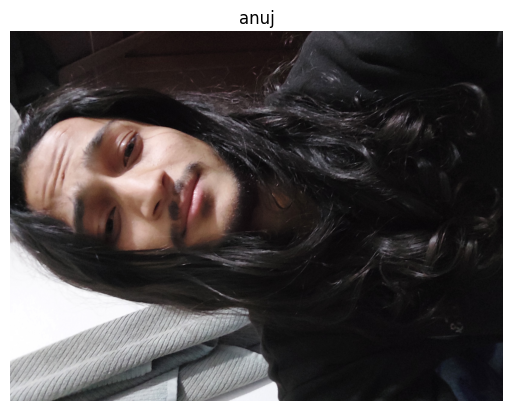

In [15]:
img_array = np.asarray(img)
plt.imshow(img_array)
plt.axis(False);
plt.title(class_name)

In [16]:
import torch
from torchvision import transforms

In [17]:
data_transform= transforms.Compose([
    transforms.Resize(size=(244,244)),
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.ToTensor()
])

In [18]:
def plot_transform_image(image_paths, transorm,n=3):
  
  rand_image_paths = random.sample(image_paths,k=n)
  for images in rand_image_paths:
    with Image.open(images) as f:
      fig,ax = plt.subplots(1,2)
      #original images
      ax[0].imshow(f)
      ax[0].set_title(f"image size:{f.size}")
      ax[0].axis(False)
      
      #transformed images
      transformed_image = transorm(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"image size:{transformed_image.shape}")
      ax[1].axis(False)

      fig.suptitle(f"class:{images.parent.stem}")



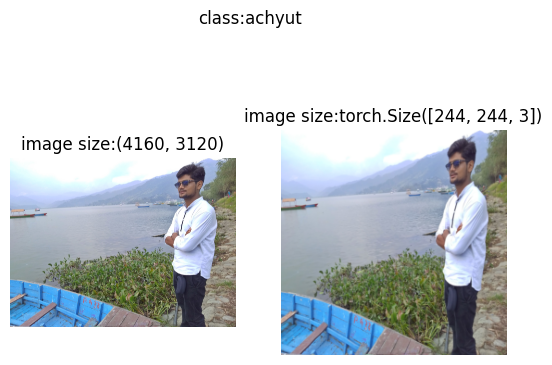

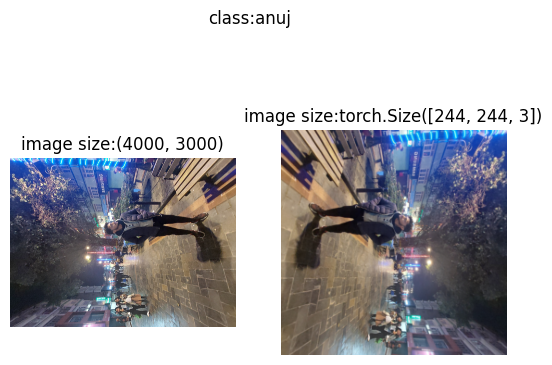

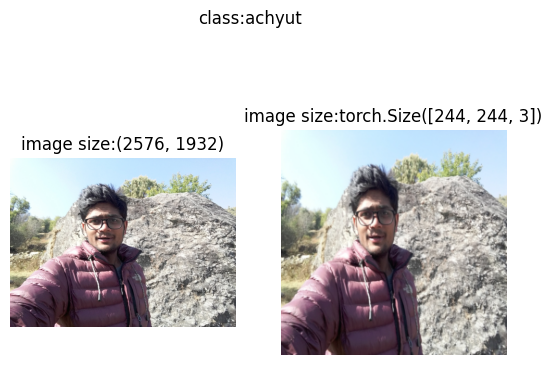

In [19]:
plot_transform_image(image_list,data_transform)

In [20]:
from torchvision import datasets

In [21]:
train_data = datasets.ImageFolder(
    root=train_dir,
    transform=data_transform,
)
test_data = datasets.ImageFolder(
    root=test_dir,
    transform=data_transform,
)
test_data,len(test_data)

(Dataset ImageFolder
     Number of datapoints: 28
     Root location: datas/main/anuj_achyut/test
     StandardTransform
 Transform: Compose(
                Resize(size=(244, 244), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.3)
                ToTensor()
            ),
 28)

In [22]:
class_names = train_data.classes
class_names

['achyut', 'anuj']

In [23]:
from torch.utils.data import DataLoader

In [24]:
Batch=8
train_dataloader=DataLoader(
    dataset=train_data,
    batch_size=Batch,
    shuffle=True
)
test_dataloader=DataLoader(
    dataset=test_data,
    batch_size=Batch,
    shuffle=False
)

In [25]:
from torchvision.models import mobilenet_v3_small
import torchvision


In [26]:
weight=torchvision.models.MobileNet_V3_Small_Weights.DEFAULT
model_0=mobilenet_v3_small(weights=weight).to(device)

Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth
100%|██████████| 9.83M/9.83M [00:00<00:00, 59.3MB/s]


In [27]:
model_0

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

In [28]:
from torchsummary import summary
summary(model=model_0,
        input_size=(3,224,224)
       
)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 112, 112]             432
       BatchNorm2d-2         [-1, 16, 112, 112]              32
         Hardswish-3         [-1, 16, 112, 112]               0
            Conv2d-4           [-1, 16, 56, 56]             144
       BatchNorm2d-5           [-1, 16, 56, 56]              32
              ReLU-6           [-1, 16, 56, 56]               0
 AdaptiveAvgPool2d-7             [-1, 16, 1, 1]               0
            Conv2d-8              [-1, 8, 1, 1]             136
              ReLU-9              [-1, 8, 1, 1]               0
           Conv2d-10             [-1, 16, 1, 1]             144
      Hardsigmoid-11             [-1, 16, 1, 1]               0
SqueezeExcitation-12           [-1, 16, 56, 56]               0
           Conv2d-13           [-1, 16, 56, 56]             256
      BatchNorm2d-14           [-1, 16,

In [ ]:
from torchsummary import summary
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

for param in model_0.features.parameters():
    param.requires_grad = False

# Get the length of class_names (one output unit for each class)
output_shape = len(train_data.classes)


# Recreate the classifier layer and seed it to the target device
model_0.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.3, inplace=True), 
    torch.nn.Linear(in_features=576, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True))


In [ ]:
from torchsummary import summary
summary(model=model_0.cuda(),
        input_size=(3,224,224)
       
)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 112, 112]             432
       BatchNorm2d-2         [-1, 16, 112, 112]              32
         Hardswish-3         [-1, 16, 112, 112]               0
            Conv2d-4           [-1, 16, 56, 56]             144
       BatchNorm2d-5           [-1, 16, 56, 56]              32
              ReLU-6           [-1, 16, 56, 56]               0
 AdaptiveAvgPool2d-7             [-1, 16, 1, 1]               0
            Conv2d-8              [-1, 8, 1, 1]             136
              ReLU-9              [-1, 8, 1, 1]               0
           Conv2d-10             [-1, 16, 1, 1]             144
      Hardsigmoid-11             [-1, 16, 1, 1]               0
SqueezeExcitation-12           [-1, 16, 56, 56]               0
           Conv2d-13           [-1, 16, 56, 56]             256
      BatchNorm2d-14           [-1, 16,

In [29]:
from torch import nn
loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.001)
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

In [30]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc
     

In [31]:
from tqdm.auto import tqdm

In [32]:
epochs=40
for epoch in tqdm(range(epochs)):
  train_loss,train_accuracy=0,0
  model_0.train
  for batch,(X,y) in enumerate(train_dataloader):
    X = X.cuda()
    y = y.cuda()
    y_pred = model_0(X)
    loss=loss_fn(y_pred,y)
    train_loss += loss
    acc = accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    train_accuracy+=acc
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss/=len(train_dataloader)
  train_accuracy /= len(train_dataloader)      

  test_loss=0
  test_accuracy=0
  model_0.eval()
  with torch.inference_mode():
    for batch,(X,y) in enumerate(test_dataloader):
      X = X.cuda()
      y = y.cuda()
      test_pred = model_0(X)
      loss= loss_fn(test_pred,y)
      test_loss+=loss
      acc = accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
      test_accuracy+=acc
  
    test_loss /= len(test_dataloader)
    test_accuracy /= len(test_dataloader)      
      
  print(f"epoch:{epoch},train_loss:{train_loss},test_loss:{test_loss},train_accuracy:{train_accuracy}%test_accuracy{test_accuracy}%")

  0%|          | 0/40 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:2918: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


epoch:0,train_loss:2.203636884689331,test_loss:2.5670487880706787,train_accuracy:60.0%test_accuracy56.25%
epoch:1,train_loss:2.142944097518921,test_loss:1.2451486587524414,train_accuracy:60.0%test_accuracy56.25%
epoch:2,train_loss:0.9436489343643188,test_loss:2.0337588787078857,train_accuracy:65.0%test_accuracy43.75%
epoch:3,train_loss:1.8114566802978516,test_loss:4.016352653503418,train_accuracy:60.0%test_accuracy40.625%
epoch:4,train_loss:1.8399447202682495,test_loss:1.1169062852859497,train_accuracy:53.75%test_accuracy56.25%
epoch:5,train_loss:2.066319227218628,test_loss:1.8093799352645874,train_accuracy:46.25%test_accuracy53.125%
epoch:6,train_loss:1.4098799228668213,test_loss:0.9097259044647217,train_accuracy:48.75%test_accuracy40.625%
epoch:7,train_loss:0.8308493494987488,test_loss:0.7832951545715332,train_accuracy:52.5%test_accuracy34.375%
epoch:8,train_loss:0.7439910769462585,test_loss:0.6629053950309753,train_accuracy:58.75%test_accuracy68.75%
epoch:9,train_loss:0.818017601966

In [33]:
model_0.eval()
with torch.inference_mode():
  loss,acc=0,0
  for X,y in test_dataloader:
    X = X.cuda()
    y = y.cuda()
    y_prediction = model_0(X)
    print(torch.softmax(y_prediction,dim=1))
    # print(f"{y_prediction.argmax(dim=1)},{y}")
    loss+=loss_fn(y_prediction,y)
    acc+=accuracy_fn(y,y_prediction.argmax(dim=1))
  loss/=len(test_dataloader)
  acc/=len(test_dataloader)  
  
print(f"loss:{loss}....acc:{acc}")

tensor([[8.5707e-01, 1.4139e-01, 2.8354e-06,  ..., 4.1247e-07, 2.5866e-07,
         3.4033e-06],
        [6.2206e-01, 3.7694e-01, 2.1333e-06,  ..., 1.5017e-07, 1.3789e-07,
         2.0333e-06],
        [4.8689e-01, 5.0959e-01, 1.3188e-05,  ..., 8.5714e-07, 7.0111e-07,
         8.5406e-06],
        ...,
        [7.9535e-01, 2.0161e-01, 4.2080e-06,  ..., 7.5996e-07, 9.6728e-07,
         5.7245e-06],
        [9.0095e-01, 9.8002e-02, 3.3499e-06,  ..., 3.0607e-07, 4.1218e-07,
         2.6299e-06],
        [9.0422e-01, 9.3489e-02, 5.0867e-06,  ..., 8.2734e-07, 7.1758e-07,
         7.2171e-06]], device='cuda:0')
tensor([[8.3644e-01, 1.6272e-01, 1.6695e-06,  ..., 1.7317e-07, 1.9518e-07,
         2.2382e-06],
        [8.0061e-01, 1.9830e-01, 2.2243e-06,  ..., 2.7459e-07, 2.5273e-07,
         3.5259e-06],
        [6.2372e-01, 3.7491e-01, 2.6306e-06,  ..., 3.2453e-07, 1.0026e-06,
         3.1989e-06],
        ...,
        [9.6232e-01, 3.3736e-02, 9.3088e-06,  ..., 1.0154e-06, 5.4409e-07,
        

In [34]:
custom_image_transform = transforms.Compose([
transforms.Resize((244,244))
])

In [101]:
image_list = list(data_path.glob("*.jpg"))
image_list

[PosixPath('datas/55.jpg'),
 PosixPath('datas/6.jpg'),
 PosixPath('datas/1.jpg'),
 PosixPath('datas/IMG_20211231_171531.jpg'),
 PosixPath('datas/3.jpg'),
 PosixPath('datas/345986748_1342133229676939_3444397970518368720_n.jpg')]

In [36]:
import torchvision


In [102]:
def FinalPred(model:torch.nn.Module,
               transform=None,
              ):
  #image_list = list(image_path.glob("train/*/*.jpg"))
  # image_list = list(data_path.glob("55.JPG"))

  rand_image_paths = random.sample(image_list,k=1)
  # print(rand_image_paths)
  for path in rand_image_paths:
    custom_image = torchvision.io.read_image(str(path)).type(torch.float32)
    real_class=path.parent.stem
    custom_image = custom_image / 255
    if transform:
      transformed_image = transform(custom_image)
    model_0.eval()
    with torch.inference_mode():
        predict = model_0(transformed_image.unsqueeze(dim=0).to(device))
    custom_image_pred= torch.softmax(predict,dim=1)
    custom_image_label=torch.argmax(predict,dim=1).item()
    custom_image_class=class_names[custom_image_label]
    # print(custom_image_pred)
    plt.imshow(transformed_image.permute(1,2,0))
    title=(f" Real_class:{real_class}|predicted_class:{custom_image_class}|probability:{custom_image_pred.max():.3f}")
    plt.title(title)
    plt.axis(False);


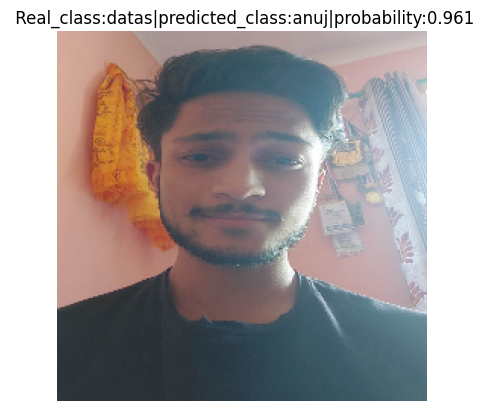

In [103]:
FinalPred(model_0,custom_image_transform)

#Loading our saved model

In [4]:
file_path = '/content/drive/My Drive/main/my_model.pth'
torch.save((model_0),file_path)
     

NameError: ignored

In [5]:
%cd /content/drive/MyDrive/main

/content/drive/MyDrive/main


In [105]:
ls

anuj_achyut@  my_model.pth


In [107]:
model_1 = torch.load('my_model.pth')

In [108]:
model_1

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 